In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [27]:
#import dataset
moodata = pd.read_csv("moodhc_theta_array.csv")

In [108]:
#datacheck
moodata.shape
#moodata.head

(361, 20)

# Splitting data

In [352]:
#data preprocessing
X = moodata.drop('Class', axis=1)
y = moodata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Applying and training on PCA data

In [97]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(361, 5)

In [98]:
X.shape
X_pca

array([[-1.67199023e+01,  4.03203633e-01, -1.11224187e+00,
        -2.16431151e+00,  4.36048490e-02],
       [-2.25669035e+01, -3.88767778e+00,  1.78078148e+00,
         3.54181527e+00, -8.77392668e-01],
       [ 6.32678933e+00,  1.15025633e+01, -8.83003183e+00,
        -8.96814608e-01, -1.39170699e+00],
       ...,
       [ 2.65599512e+01,  1.75956280e+01, -5.75979430e+00,
        -6.51068867e+00, -1.97010395e+00],
       [-7.17803015e+00,  2.18351321e+00, -4.11390679e+00,
         3.30588670e+00,  4.41708848e-01],
       [ 7.96327909e+01,  6.96079063e+00,  8.40573481e+00,
        -8.79085801e+00,  1.59150036e+01]], shape=(361, 5))

In [99]:
pca.explained_variance_ratio_

array([0.83976826, 0.06693836, 0.01849109, 0.01788237, 0.01086185])

In [100]:
pca.n_components_

np.int64(5)

In [101]:
#new splitting test data using pca
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

# SVM Model

In [209]:
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [207]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [208]:
svclassifier.score(X_test, y_test)

0.8082191780821918

In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.81      1.00      0.89        59

    accuracy                           0.81        73
   macro avg       0.40      0.50      0.45        73
weighted avg       0.65      0.81      0.72        73



/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [219]:
y_scores = svclassifier.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6004842615012107


In [390]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

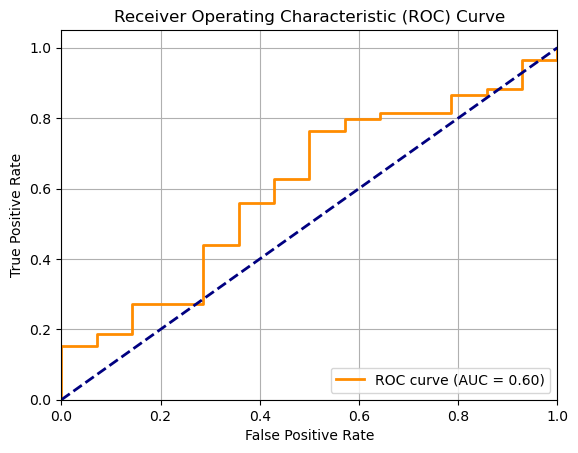

In [220]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVM for PCA

In [225]:
#new svm model from pca data
newsvm=SVC(kernel='linear', probability=True)
newsvm.fit(X_train_pca, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [226]:
y_pred = newsvm.predict(X_test_pca)
newsvm.score(X_test_pca, y_test)

0.8082191780821918

In [227]:
print(classification_report(y_test, y_pred))
print(y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.81      1.00      0.89        59

    accuracy                           0.81        73
   macro avg       0.40      0.50      0.45        73
weighted avg       0.65      0.81      0.72        73

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.5907990314769975


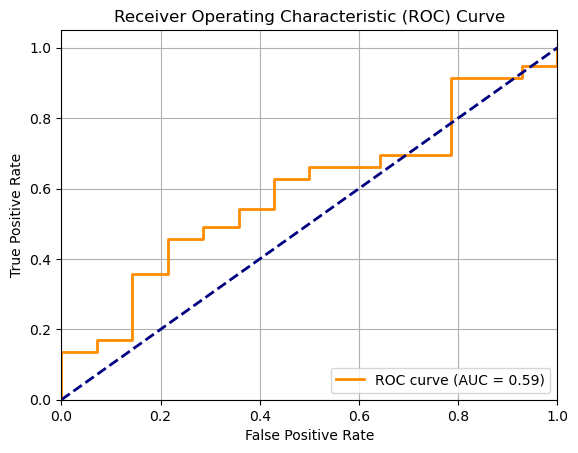

In [228]:
y_scores = newsvm.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# KNN Model

In [231]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [232]:
knn.score(X_test, y_test)

0.7808219178082192

In [233]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.81      0.95      0.88        59

    accuracy                           0.78        73
   macro avg       0.53      0.51      0.49        73
weighted avg       0.70      0.78      0.73        73



0.4079903147699758


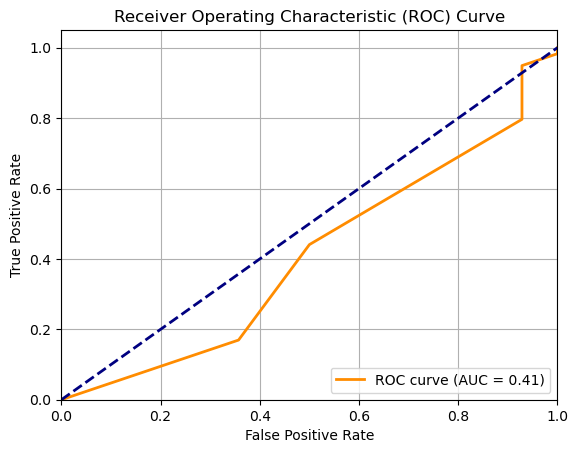

In [235]:
y_scores = knn.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# KNN for PCA

In [236]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [237]:
knn.score(X_test_pca, y_test)

0.8082191780821918

In [238]:
y_pred = knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36        14
           1       0.85      0.93      0.89        59

    accuracy                           0.81        73
   macro avg       0.67      0.61      0.63        73
weighted avg       0.78      0.81      0.79        73



0.6131961259079902


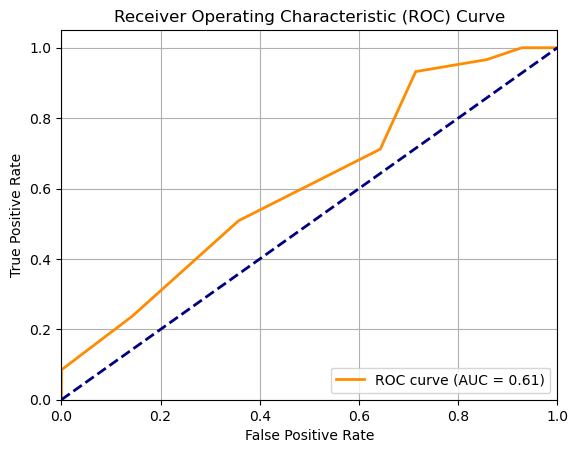

In [239]:
y_scores = knn.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest Model

In [245]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [246]:
model.score(X_test, y_test)

0.7123287671232876

In [247]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        14
           1       0.80      0.86      0.83        59

    accuracy                           0.71        73
   macro avg       0.45      0.47      0.46        73
weighted avg       0.67      0.71      0.69        73



0.38438256658595643


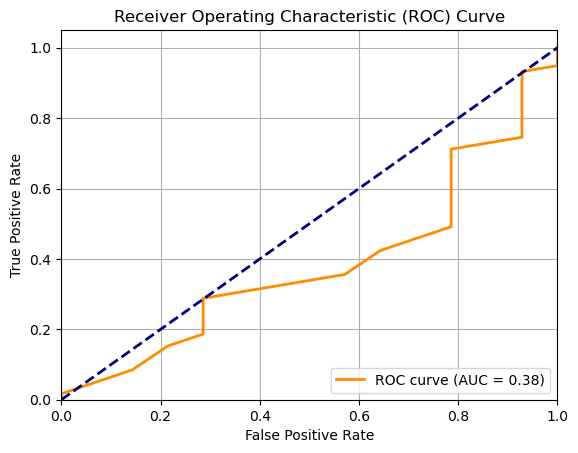

In [248]:
y_scores = model.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest for PCA

In [249]:
pmodel = RandomForestClassifier(n_estimators=40)
pmodel.fit(X_train_pca, y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [250]:
pmodel.score(X_test_pca, y_test)

0.7671232876712328

In [251]:
y_pred = pmodel.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.81      0.93      0.87        59

    accuracy                           0.77        73
   macro avg       0.50      0.50      0.49        73
weighted avg       0.69      0.77      0.72        73



0.6398305084745762


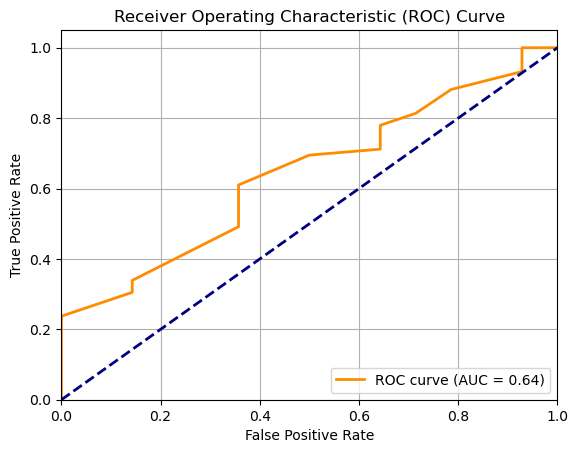

In [252]:
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Logistic Regression Model

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
model = LogisticRegression()

In [255]:
model.fit(X_train, y_train)

/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [256]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [257]:
model.score(X_test, y_test)

0.7808219178082192

In [258]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.80      0.97      0.88        59

    accuracy                           0.78        73
   macro avg       0.40      0.48      0.44        73
weighted avg       0.65      0.78      0.71        73



0.4564164648910412


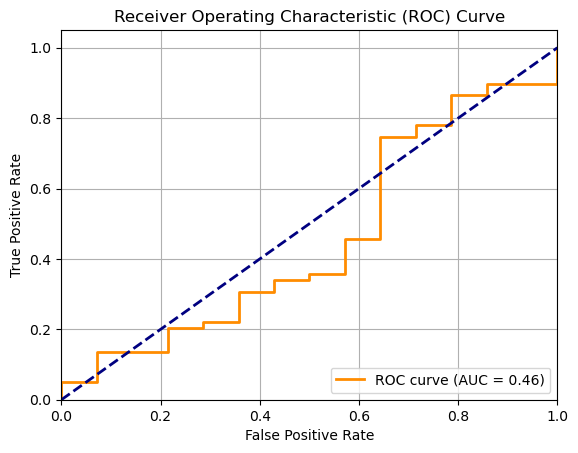

In [259]:
y_scores = model.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Logistic Regression for PCA

In [260]:
pmodel = LogisticRegression()

In [261]:
pmodel.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [262]:
pmodel.predict(X_test_pca)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [263]:
pmodel.score(X_test_pca, y_test)

0.7945205479452054

In [264]:
y_pred = pmodel.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.81      0.98      0.89        59

    accuracy                           0.79        73
   macro avg       0.40      0.49      0.44        73
weighted avg       0.65      0.79      0.72        73



0.62590799031477


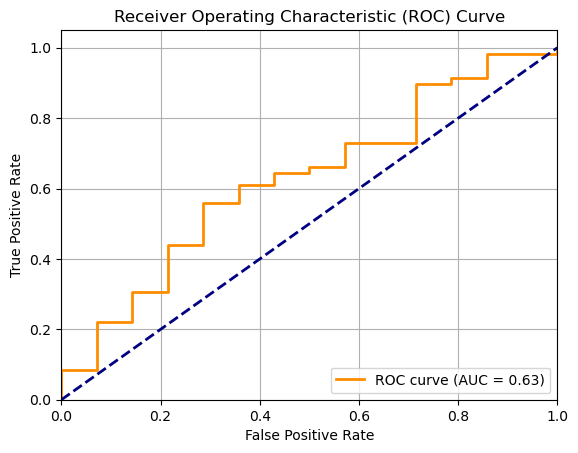

In [265]:
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Elastic Net Regression

In [292]:
scaler = StandardScaler()

In [293]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [294]:
from sklearn.linear_model import ElasticNet

In [295]:
elastic_net = ElasticNet()

In [296]:
elastic_net.fit(X_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [297]:
y_pred = elastic_net.predict(X_test)

In [298]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [299]:
mean_absolute_error(y_test, y_pred)

0.3651541095890411

In [300]:
mean_squared_error(y_test, y_pred)

0.1630056720890411

In [301]:
r2_score(y_test, y_pred)

-0.051643131431598155

In [302]:
param_grid = {
    'alpha':[0.1,0.3,0.5,0.7,0.9,1.0],
    'l1_ratio':[0.1,0.3,0.5,0.7,0.9,1.0]
}

In [303]:
from sklearn.model_selection import GridSearchCV

In [304]:
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [305]:
elastic_cv.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.1, 0.3, ...], 'l1_ratio': [0.1, 0.3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [306]:
y_pred2 = elastic_cv.predict(X_test)

In [308]:
mean_absolute_error(y_test, y_pred2)

0.36828555327956997

In [309]:
mean_squared_error(y_test, y_pred2)

0.16681734700574744

In [310]:
r2_score(y_test, y_pred2)

-0.07623443364846016

# Elastic Net Regression PCA

In [329]:
scaler = StandardScaler()

In [330]:
pcaX_train = scaler.fit_transform(X_train_pca)
pcaX_test = scaler.fit_transform(X_test_pca)

In [331]:
elastic_net = ElasticNet()

In [332]:
elastic_net.fit(pcaX_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [333]:
y_pred = elastic_net.predict(pcaX_test)

In [334]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [335]:
mean_absolute_error(y_test, y_pred)

0.3651541095890411

In [336]:
mean_squared_error(y_test, y_pred)

0.1630056720890411

In [337]:
r2_score(y_test, y_pred)

-0.051643131431598155

In [338]:
param_grid = {
    'alpha':[0.1,0.3,0.5,0.7,0.9,1.0],
    'l1_ratio':[0.1,0.3,0.5,0.7,0.9,1.0]
}

In [339]:
from sklearn.model_selection import GridSearchCV

In [340]:
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [346]:
elastic_cv.fit(pcaX_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.1, 0.3, ...], 'l1_ratio': [0.1, 0.3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [347]:
y_pred2 = elastic_cv.predict(pcaX_test)

In [348]:
mean_absolute_error(y_test, y_pred2)

0.3651541095890411

In [349]:
mean_squared_error(y_test, y_pred2)

0.1630056720890411

In [350]:
r2_score(y_test, y_pred2)

-0.051643131431598155

# XGM Boost

In [354]:
import xgboost as xgb

In [355]:
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)

In [356]:
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[0]	validation_0-logloss:0.64818
[1]	validation_0-logloss:0.66733
[2]	validation_0-logloss:0.65314


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,2
,enable_categorical,False
,eval_metric,None


In [359]:
y_pred = clf.predict(X_test)

In [361]:
clf.score(X_test, y_test)

0.6575342465753424

In [362]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.66      1.00      0.79        48

    accuracy                           0.66        73
   macro avg       0.33      0.50      0.40        73
weighted avg       0.43      0.66      0.52        73



/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.56125


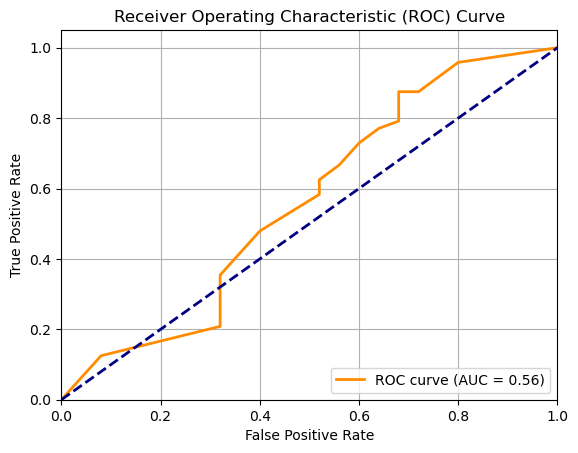

In [363]:
y_scores = clf.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# XGB PCA

In [375]:
pxgb = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)

In [376]:
pxgb.fit(X_train_pca, y_train, eval_set=[(X_test_pca, y_test)])

[0]	validation_0-logloss:0.69929
[1]	validation_0-logloss:0.72630


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,2
,enable_categorical,False
,eval_metric,None


In [377]:
pxgb.score(X_test_pca, y_test)

0.6575342465753424

In [378]:
y_pred = pxgb.predict(X_test_pca)

In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.66      1.00      0.79        48

    accuracy                           0.66        73
   macro avg       0.33      0.50      0.40        73
weighted avg       0.43      0.66      0.52        73



/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.4320833333333334


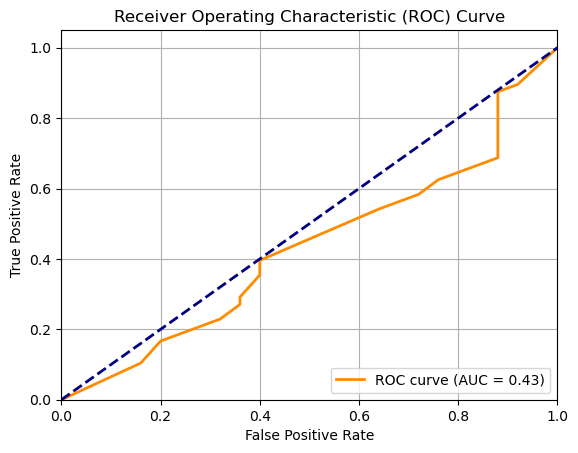

In [380]:
y_scores = pxgb.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# LGM Model

In [383]:
import lightgbm

In [388]:
lmodel = lightgbm.LGBMModel(X_train, y_train)

TypeError: LGBMModel.__init__() takes 1 positional argument but 3 were given